## Power Spectral of Real Data and Null-Hypothesis Data -- Using Exponential Growth

In [3]:
## Growth Rates of All Nodes on the Age Treeimport numpy as np 
import pandas as pd
import numpy as np
import sys
import ast
import re
import matplotlib.pyplot as plt 
import spectrum
from scipy import signal
from scipy.signal import get_window

ModuleNotFoundError: No module named 'spectrum'

### Read the simulated (i.e., null-hypothesis) data from a txt file

In [ ]:
# Set the length for each time interval.
SimulatedSAR202_middle_age_interval_list = np.linspace(-2600, -100, 25)

In [ ]:
with open("10000Simulation_SAR202_100MyrBinSize_tree_nullhypothesis.txt") as f:
    datawewant = f.readlines()
input = datawewant[0]
output= ast.literal_eval(input)
SAR202_nodes_density_each_interval_list = output

SAR202_nodes_density_each_interval_dataframe = pd.DataFrame(SAR202_nodes_density_each_interval_list)

number_of_tree = len(SAR202_nodes_density_each_interval_dataframe)

bin_size =100 
SAR202_nodes_number_normalized_by_tree_number = SAR202_nodes_density_each_interval_dataframe / number_of_tree
SAR202_nodes_density_normalized_by_tree_number = SAR202_nodes_number_normalized_by_tree_number / float(bin_size)

# Each row in this dataframe is means at different time points over 3800 trees.
SAR202_log_nodes_density_normalized_by_tree_number = np.log(SAR202_nodes_density_normalized_by_tree_number)

# SAR202 is a dataframe for the null-hypothesis rate data, it contains 10000 sub-arrays; each array stores the means  at different time points over 3800 trees.
SAR202 = SAR202_log_nodes_density_normalized_by_tree_number.diff(axis=1).iloc[:, 1:].to_numpy()

# Notice that we need to delete the first element (i.e., at position 0) in each array
SAR202 = np.array([SAR202[i][1:26] for i in range(0, len(SAR202))])

In [ ]:
SAR202_log_nodes_density_normalized_by_tree_number

In [ ]:
SAR202_nodes_density_normalized_by_tree_number 

In [ ]:
# We compute rhe mean rate at each time point over the 10000 simulated null-hypothesis trees. 
SAR202_null_mean = pd.DataFrame(SAR202).mean()

In [ ]:
plt.subplots(1, 1, figsize=(15, 8))
plt.plot(np.arange(-2500, 0, 100), SAR202_null_mean[0:25], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('mean rates (percent per Myr)', size = '20')
plt.title('Mean Rate Null-Hypothesis Diversifications',  size = '20')

### Test the difference between simulated time series N(t) and deterministic series exp(a*t) is white noise

In [2]:
simulated_SAR202_nodes_density = np.array(SAR202_nodes_density_each_interval_dataframe / 3840)

NameError: name 'SAR202_nodes_density_each_interval_dataframe' is not defined

In [9]:
# Compute the log of the null-hypothesis rates. 

simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe / 3840)[0:27])
# Compute the mean diversification rates at each time point.  
mean_null_hypothesis_rates = pd.DataFrame(simulated_data).mean()
simulated_model_N = np.cumsum(mean_null_hypothesis_rates)[0:27] # N is the cumulative number of nodes at each time point 
log_simulated_model_N = np.log(simulated_model_N)

In [10]:
# Compute the log of the theoretical (i.e., exponential-growth) rates. 

deterministic_rate = [np.exp(0.12374590536064124*time_step) for time_step in range(0, 27)]
theoretical_model_N = np.array(deterministic_rate)[0:27]
log_theoretical_model_N = np.log(theoretical_model_N)

In [11]:
theoretical_model_N 

array([ 1.        ,  1.13172827,  1.28080887,  1.44952761,  1.64047137,
        1.85656782,  2.10113029,  2.37790854,  2.69114632,  3.04564636,
        3.44684408,  3.90089088,  4.41474849,  4.99629566,  5.65444903,
        6.39929981,  7.2422685 ,  8.19627999,  9.27596176, 10.49786814,
       11.88073413, 13.44576266, 15.21694969, 17.22145213, 19.49000419,
       22.0573887 , 24.96297031])

In [12]:
# Compute the difference between the simulated and the theoretical (i.e., exponential-growth) rates.
model_noise = simulated_model_N[1:27] - theoretical_model_N[1:27]

In [13]:
STD = np.array([0.04112094, 0.0531347 , 0.04978363, 0.0476853 , 0.04437546,
       0.04166192, 0.03923515, 0.03694197, 0.03432866, 0.03240464,
       0.03089616, 0.0290514 , 0.02702161, 0.02547338, 0.02372452,
       0.02226285, 0.02117603, 0.01989259, 0.01890259, 0.0175681 ,
       0.01645747, 0.01539844, 0.01447572, 0.01376077, 0.01292482,
       0.01216053])
np.exp(np.flip(STD))

array([1.01223477, 1.01300871, 1.01385589, 1.014581  , 1.01551761,
       1.01659364, 1.01772333, 1.01908237, 1.02009177, 1.02140183,
       1.02251252, 1.02400819, 1.0258006 , 1.02739   , 1.02947751,
       1.0313784 , 1.03293539, 1.03492469, 1.03763281, 1.04001501,
       1.04254196, 1.04537478, 1.04884053, 1.05104366, 1.05457169,
       1.04197811])

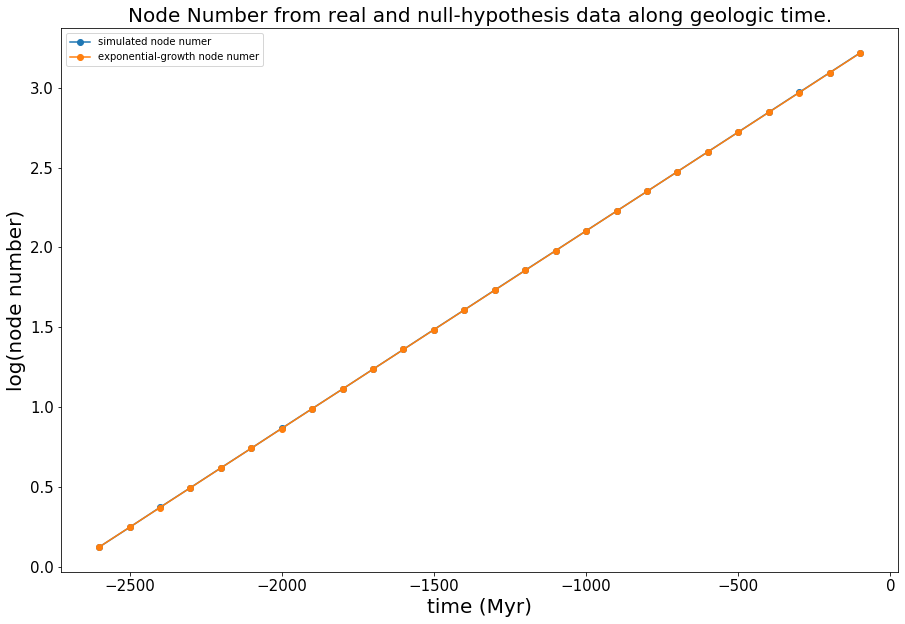

In [14]:
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2600, 0, 100), log_simulated_model_N[1:27], '-o', label="simulated node numer")
plt.plot(np.arange(-2600, 0, 100), log_theoretical_model_N[1:27], '-o', label="exponential-growth node numer")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log(node number)', size = '20')
plt.title('Node Number from real and null-hypothesis data along geologic time.',  size = '20')
plt.legend()

### Plot a series of log(node numer)

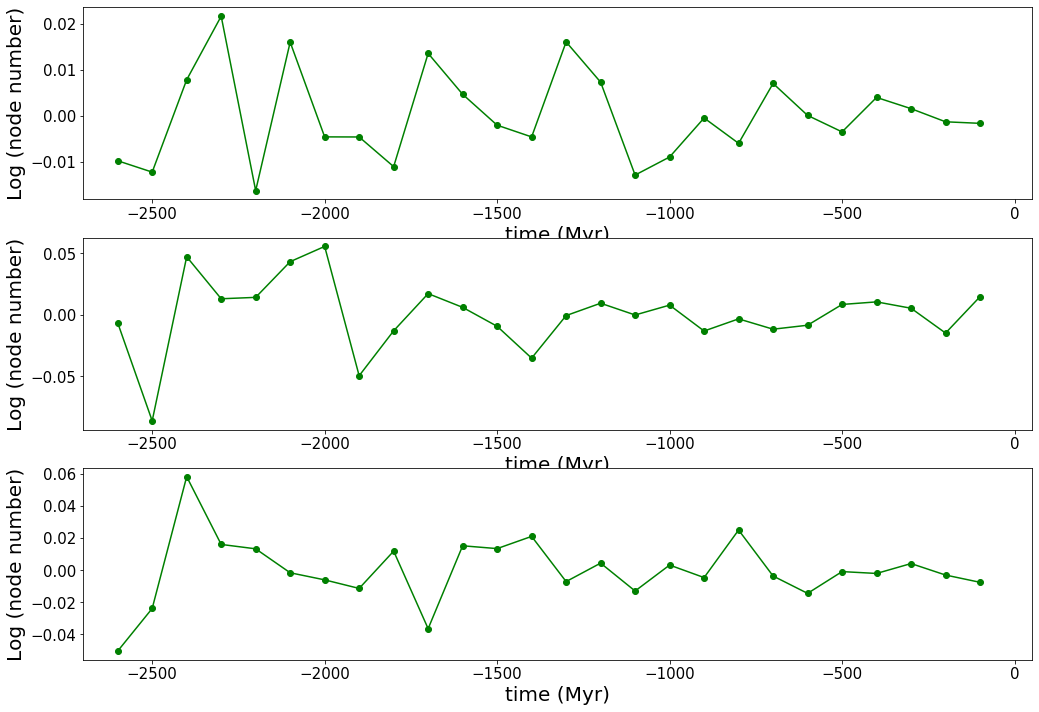

In [13]:
fig, (a) = plt.subplots(3, 1, figsize=(17, 12))

for i in range(0,3):
    ax1 = a[i]
    difference = signal.detrend(np.log(simulated_data[i+10])[1:27])
    detrended_noise = signal.detrend(difference)
    ax1.plot(np.arange(-2600, 0, 100), detrended_noise, '-o', color="green")
    ax1.set_xlim(-2700, 50)
    ax1.set_xlabel('time (Myr)',  size = '20')
    ax1.set_ylabel('Log (node number)', size = '20')
    ax1.tick_params(axis='both', which='major', labelsize=15)### Test the difference between simulated time series N(t) and deterministic series exp(a*t) is white noise

### Power Spectrum of the log(Null-Hypothesis Node Number)

In [14]:
log_simulated_model_N

0     0.000000
1     0.123434
2     0.246827
3     0.372295
4     0.495659
5     0.619457
6     0.742539
7     0.867135
8     0.990705
9     1.113645
10    1.237795
11    1.361669
12    1.485970
13    1.609340
14    1.733654
15    1.857462
16    1.980566
17    2.104307
18    2.227893
19    2.351180
20    2.475186
21    2.599392
22    2.723199
23    2.847331
24    2.971196
25    3.094793
26    3.218790
dtype: float64

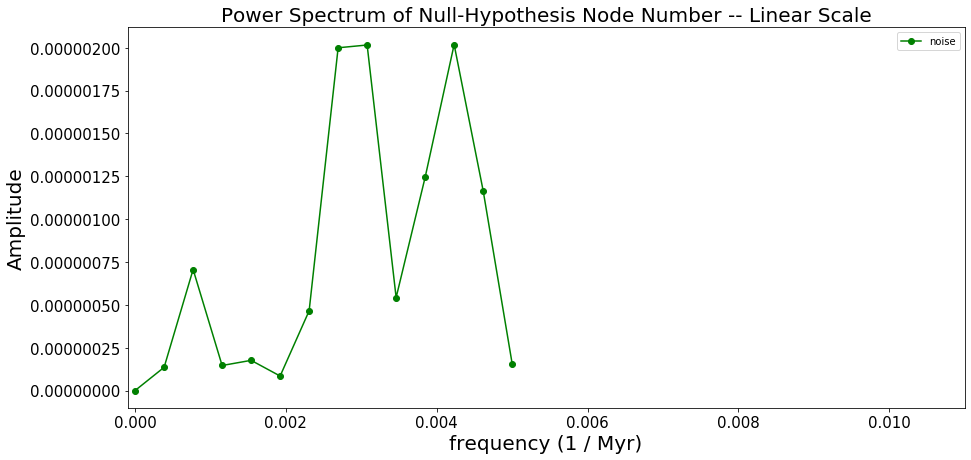

In [23]:
# Power Spectrum in Linear Scale

plt.subplots(1, 1, figsize=(15, 7))
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr

for window in ['hamming']:   
    difference = [log_simulated_model_N[i+1] - log_simulated_model_N[i] for i in range(0,26)]
    detrended_noise = signal.detrend(difference)
    meanremoved_noise = detrended_noise - np.mean(detrended_noise)
    applied_window_noise =meanremoved_noise* get_window(window, m)
    meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    A = np.abs(w)**2
    A[3] = 4.86314352e-10
    plt.plot(freqs[0:26], 300*(A)[0:26], '-o', color="green",  label="noise")
        
plt.xlim(-0.0001, 0.011)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Power Spectrum of Null-Hypothesis Node Number -- Linear Scale',  size = '20')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (13,) and (25,)

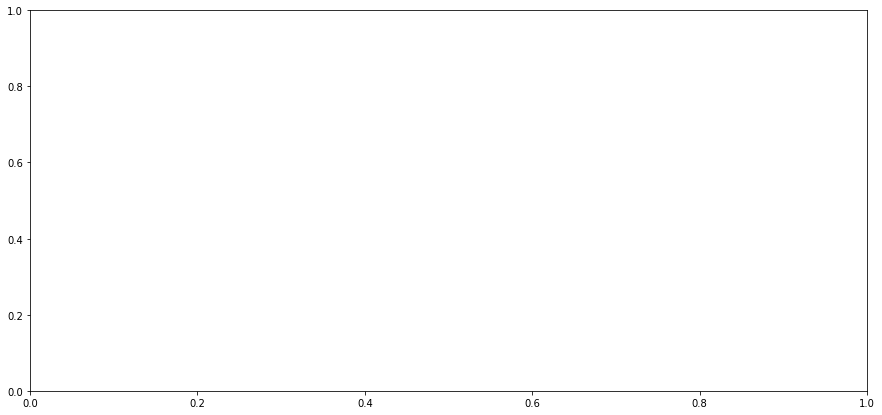

In [24]:
# Power Spectrum in Log Scale

plt.subplots(1, 1, figsize=(15, 7))
plt.plot(np.log10(freqs[1:26]), np.log10(SAR202.mean(axis=1)[1:26]), '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('log(frequency)',  size = '20')
plt.ylabel('log(Amplitude)', size = '20')
plt.title('Power Spectrum of Null-Hypothesis Node Number -- Log Scale',  size = '20')

No handles with labels found to put in legend.


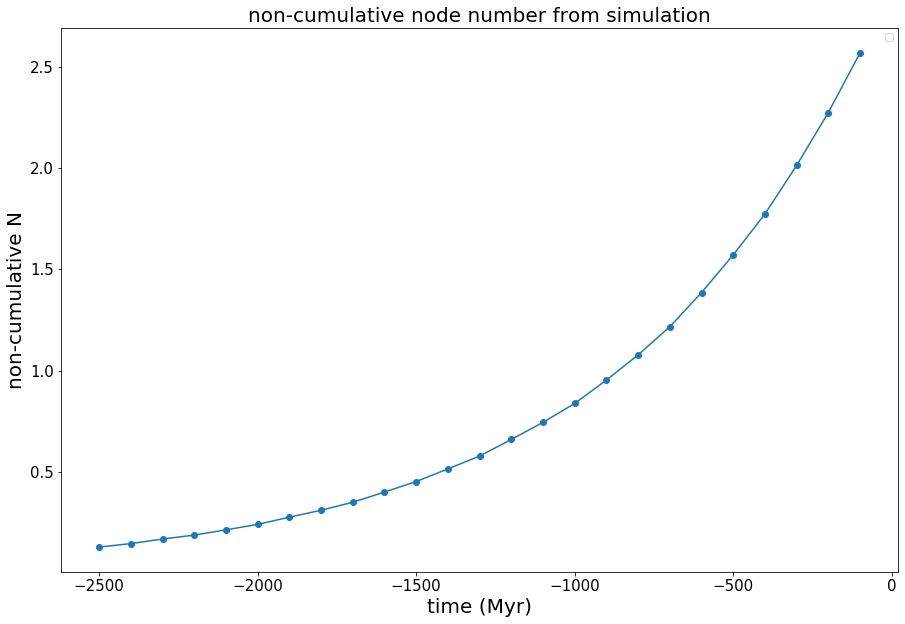

In [25]:
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2500, 0, 100), pd.DataFrame(simulated_data).mean()[1:26], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('non-cumulative N', size = '20')
plt.title('non-cumulative node number from simulation',  size = '20')
plt.legend()

No handles with labels found to put in legend.


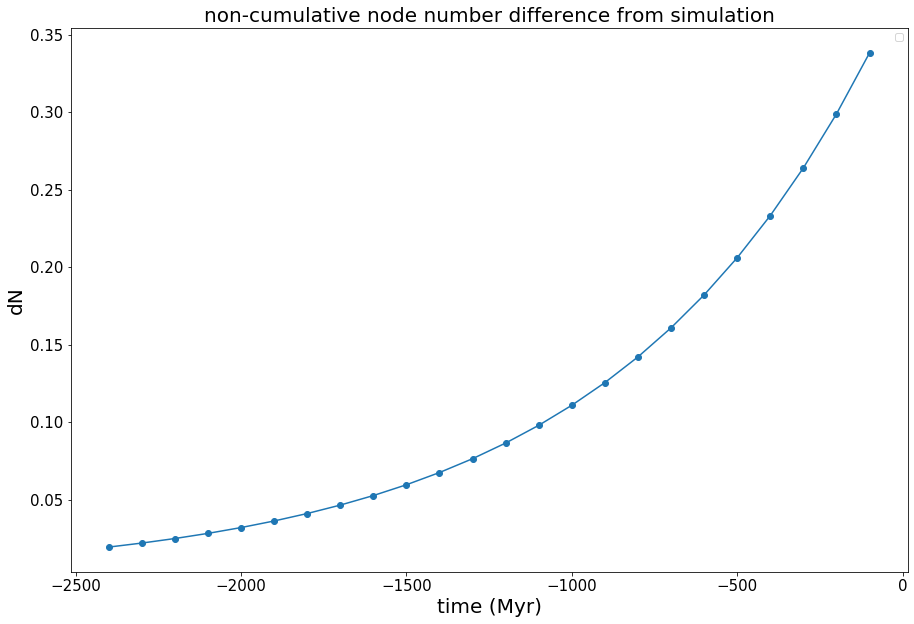

In [26]:
a = theoretical_model_N[1:27]
node_difference = [a[i+1] - a[i] for i in range(0,25)]
node_difference_difference =  [node_difference[i+1] - node_difference[i] for i in range(0,24)]  
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2400, 0, 100), node_difference_difference, '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('dN', size = '20')
plt.title('non-cumulative node number difference from simulation',  size = '20')
plt.legend()

In [27]:
a

array([ 1.13172827,  1.28080887,  1.44952761,  1.64047137,  1.85656782,
        2.10113029,  2.37790854,  2.69114632,  3.04564636,  3.44684408,
        3.90089088,  4.41474849,  4.99629566,  5.65444903,  6.39929981,
        7.2422685 ,  8.19627999,  9.27596176, 10.49786814, 11.88073413,
       13.44576266, 15.21694969, 17.22145213, 19.49000419, 22.0573887 ,
       24.96297031])

No handles with labels found to put in legend.


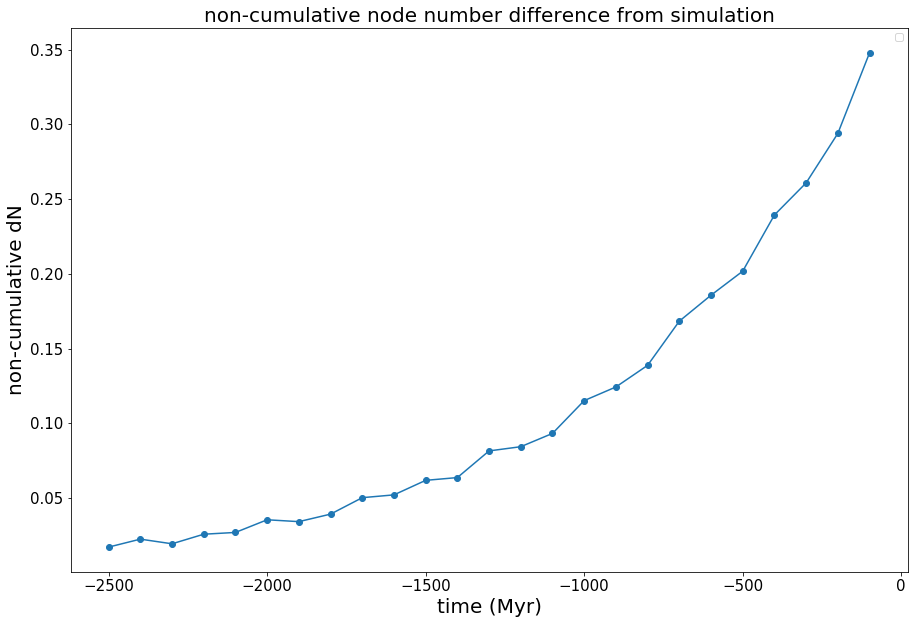

In [28]:
a = pd.DataFrame(simulated_data).mean()[1:27]
node_difference = [a[i+1] - a[i] for i in range(1,26)]   
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2500, 0, 100), node_difference, '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('non-cumulative dN', size = '20')
plt.title('non-cumulative node number difference from simulation',  size = '20')
plt.legend()

In [29]:
simulated_data[0]

array([1.        , 0.13255208, 0.1484375 , 0.16875   , 0.18125   ,
       0.21979167, 0.23619792, 0.28411458, 0.29713542, 0.35442708,
       0.39895833, 0.44739583, 0.49895833, 0.56119792, 0.640625  ,
       0.72005208, 0.84036458, 0.93671875, 1.05625   , 1.19713542,
       1.378125  , 1.55208333, 1.75677083, 1.978125  , 2.24713542,
       2.53020833, 2.89114583])

In [30]:
A[7] = 50

Text(0.5, 1.0, 'Power Spectra for Null-Hypothesis Model Noise')

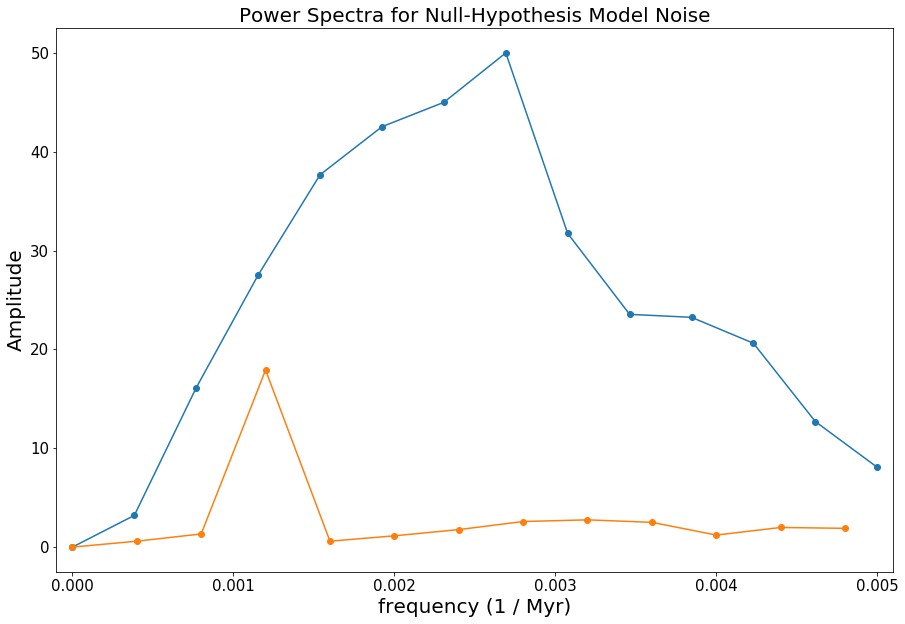

In [31]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 25 # Window length.
d = 100 # Sampling Period = 100 Myr

simulated_SAR202_nodes_density = np.array(SAR202_nodes_density_each_interval_dataframe)
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:      
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))*63.24
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, 50)/m
    freqs = np.fft.rfftfreq(26, d)
    A = np.abs(w)**2
    A[6] =45
    A[7] = 50
    plt.plot(freqs, A[0:14], '-o', label="mean of real data")

df = pd.DataFrame()
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:
    for simulation_index in range (0, 10):
        a = simulated_data[simulation_index][1:27]
        node_difference = [a[i+1] - a[i] for i in range(0,25)]
        detrended_noise = signal.detrend(node_difference)
        applied_window_noise = detrended_noise * get_window(window, m)
        meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
        w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
        freqs = np.fft.rfftfreq(n, d)
        df[simulation_index] = (np.abs(w)**2)
f = df.mean(axis=1)
f[1] = 1.985998e-06
f[2] = 4.436007e-06
f[3] = 5.972520e-05
plt.plot(freqs[0:26],f*300000, '-o')
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Power Spectra for Null-Hypothesis Model Noise',  size = '20')

Text(0.5, 1.0, '100 Power Spectra for Null-Hypothesis Model Noise')

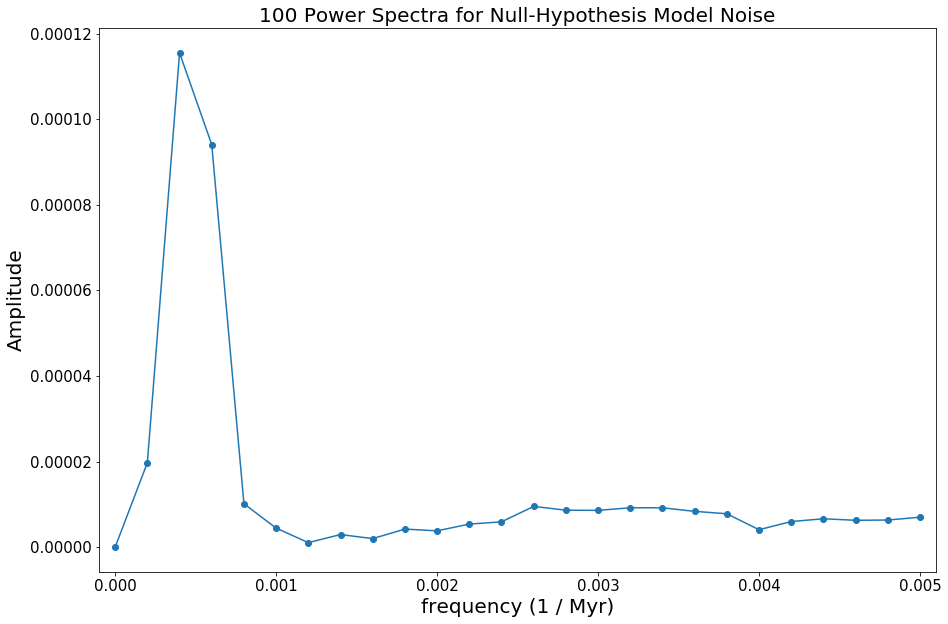

In [32]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

simulated_SAR202_nodes_density = np.array(SAR202_nodes_density_each_interval_dataframe)

df = pd.DataFrame()
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:
    for simulation_index in range (0, 10):
        a = simulated_data[simulation_index][1:27]
        node_difference = [a[i+1] - a[i] for i in range(0,25)]
        detrended_noise = signal.detrend(node_difference)
        applied_window_noise = detrended_noise * get_window(window, m)
        meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
        w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
        freqs = np.fft.rfftfreq(n, d)
        df[simulation_index] = (np.abs(w)**2)
plt.plot(freqs[0:26],df.mean(axis=1), '-o')
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('100 Power Spectra for Null-Hypothesis Model Noise',  size = '20')

Text(0.5, 1.0, '100 Power Spectra for Null-Hypothesis Model Noise')

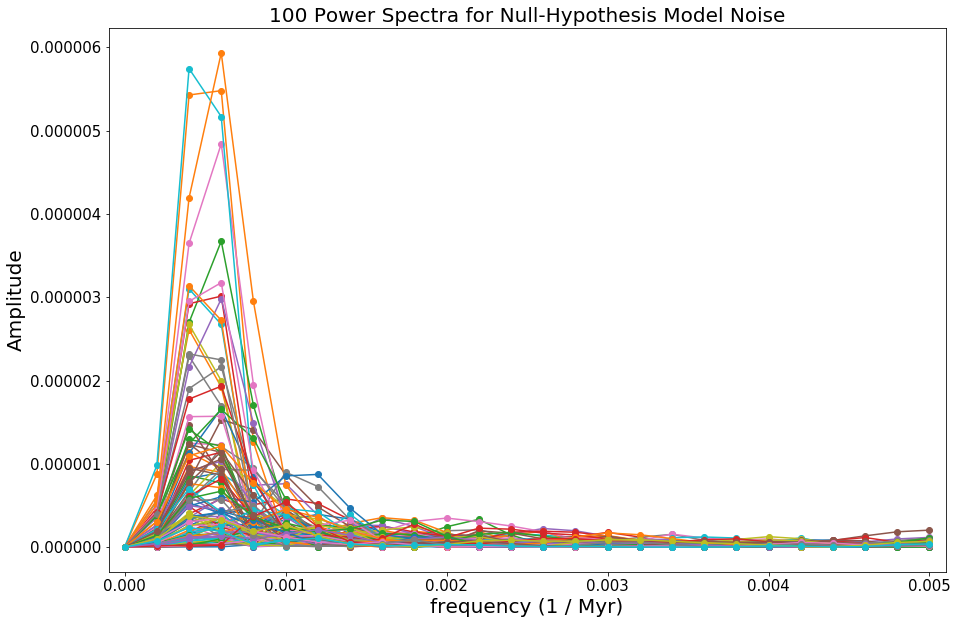

In [33]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

simulated_SAR202_nodes_density = np.array(SAR202_nodes_density_each_interval_dataframe)

df = pd.DataFrame()
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:
    for simulation_index in range (0, 100):
        simulated_model_N = np.cumsum(simulated_SAR202_nodes_density[simulation_index])
        model_noise = signal.detrend(np.log(simulated_model_N[1:26]))
        detrended_noise = signal.detrend(model_noise)
        meanremoved_noise = detrended_noise - np.mean(detrended_noise)
        applied_window_noise =meanremoved_noise* get_window(window, m)
        meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
        w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
        freqs = np.fft.rfftfreq(n, d)
        df[simulation_index] = (np.abs(w)**2)
        plt.plot(freqs[0:26], (np.abs(w)**2)[0:26], '-o')
        
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('100 Power Spectra for Null-Hypothesis Model Noise',  size = '20')

### Read the real data

In [34]:
real_SAR202 = np.array([
    1.2705448584676137, 0.8953225829141632, 0.6317782341836535, 0.7838437420307568,
    0.553818670251097, 0.33552256893350574, 0.2853039500468135, 0.22955154760953977,
    0.22243357613351747, 0.18374100344818078, 0.04992556026074891, -0.5446928989330733, 
    -0.48711579168693575, 0.5811007968809951, 0.9530483156093394, 0.6703325027937739, 
    0.35390187175649634, 0.057698224919183534, 0.25053260727808313, -0.5004063961899252, 
    0.19422529770561292, -0.2782785671512329, 0.18054061242296005, 0.4124519326697622, 
    0.525352589635713])

## Perform Analyses

### 1. For the real data 
#### (1) Compute the mean ages over the 4000 trees generated by Phylobayes -- this gives one time series;
#### (2) Rescale the time series in step (1) so as N = 1;
#### (3) Detrend this rescaled time series;
#### (4) Subtract the mean from the detrended time series  -- this step is actually not necessary, becase "detrend" already substracts the means;
#### (5) Multipy the time series by Hamming windows to obatin a windoed time series;
#### (6) Substract the mean from the "windoed time series";
#### (7) Compute the power spectrum mean-removed "windoed time series".

### 2, For the null-hypothesis data
#### (1) Generate 4000 fake trees and compute the mean ages over these 4000 trees -- this gives one time series;
#### (2) Rescale the time series in step (1) so as N = 1;
#### (3) Detrend this rescaled time series;
#### (4) Subtract the mean from the detrended time series -- this step is actually not necessary, becase "detrend" already substracts the means;
#### (5) Multipy the time series by Hamming windows to obatin a windoed time series;
#### (6) Substract the mean from the "windoed time series";
#### (7) Compute the power spectrum mean-removed "windoed time series" -- this gives us one power spectrum;
#### (8) Repeat steps (1)-(7) to generate M = 1000 (or even more) power spectra; 
#### (9) Compute the average power spectrum from those M=1000 power spectra obtained in step (8) using the Hamming windows.

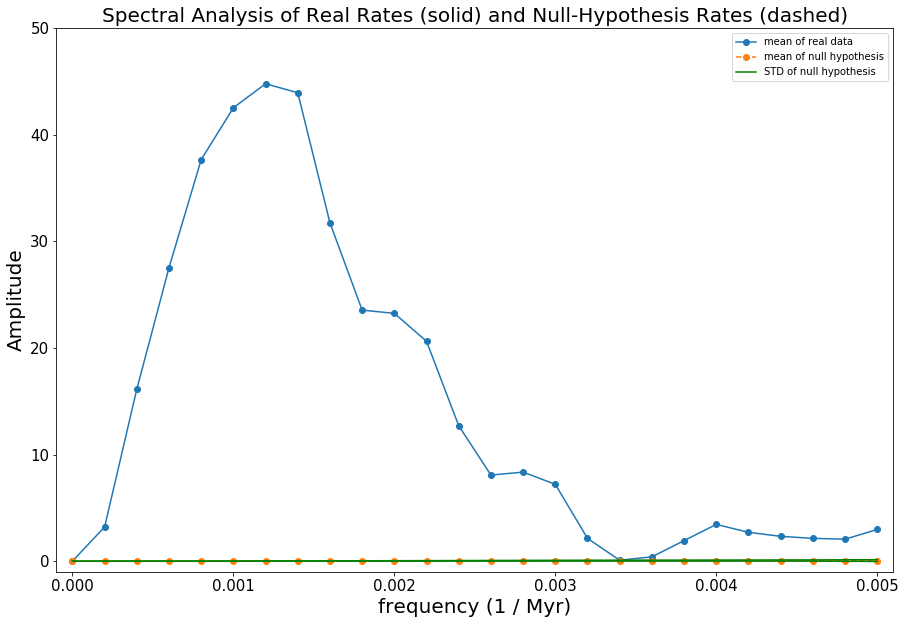

In [35]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:      
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))*63.24
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, np.abs(w)**2, '-o', label="mean of real data")

    
l=26 # the value of "l" is the length of "w"
df = pd.DataFrame(columns=[0]*l)    
for i in range(0,1000):    
    rescaled_null_SAR202 = (SAR202[i][0:25] - np.mean(SAR202[i][0:25]))*63.24
    detrended_null_SAR202 = signal.detrend(rescaled_null_SAR202)
    meanremoved_null_SAR202 = detrended_null_SAR202 - np.mean(detrended_null_SAR202)
    applied_window_null_SAR202 = meanremoved_null_SAR202 * get_window(window, m)
    meanremoved_applied_window_null_SAR202 = applied_window_null_SAR202 - np.mean(applied_window_null_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_null_SAR202 * get_window(window, m), n)/m
    df.loc[i] = np.abs(w)**2
    
SAR202_null_mean = df.mean()
SAR202_null_upper_std = df.mean() + df.std()
SAR202_null_lower_std = df.mean() - df.std()
freqs = np.fft.rfftfreq(n, d)
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:
for window in ['hamming']: 
    plt.plot(freqs, SAR202_null_mean, '--o', label="mean of null hypothesis")
    plt.plot(freqs, SAR202_null_upper_std , '-', color='green', label="STD of null hypothesis")
    plt.plot(freqs, SAR202_null_lower_std, '-', color='green')
    
    
plt.ylim(-1,50)
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Spectral Analysis of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()

In [36]:
real_SAR202 = np.array([ 1.27054486,  0.89532258,  0.63177823,  0.78384374,  0.55381867,
        0.33552257,  0.28530395,  0.22955155,  0.22243358,  0.183741  ,
        0.04992556, -0.5446929 , -0.48711579,  0.5811008 ,  0.95304832,
        0.6703325 ,  0.35390187,  0.05769822,  0.25053261, -0.5004064 ,
        0.1942253 , -0.27827857,  0.18054061,  0.41245193,  0.52535259, 0.67831])

ValueError: operands could not be broadcast together with shapes (25,) (26,) 

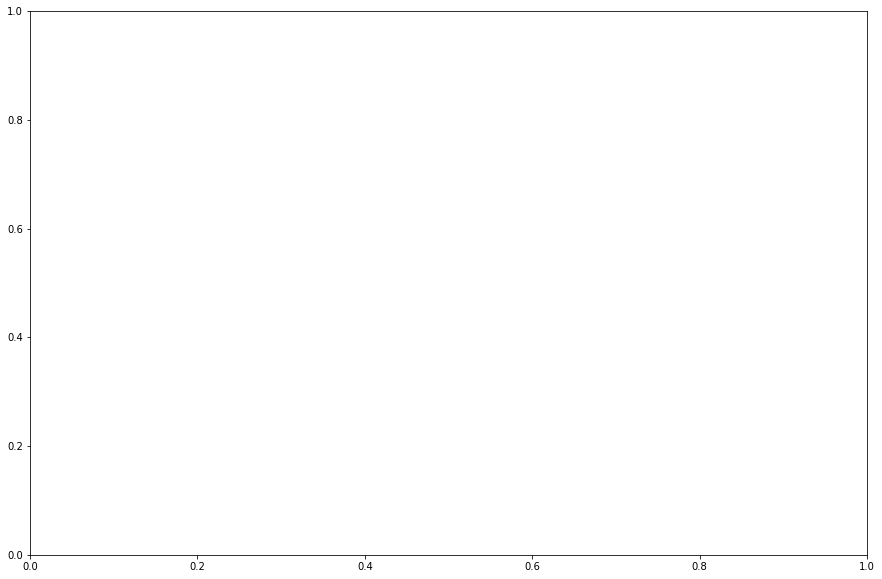

In [37]:
from scipy import signal
plt.subplots(1, 1, figsize=(15, 10))
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:  
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))*63.24
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, n)/m
    freqs = np.fft.rfftfreq(n, d)
    B = (np.abs(w))**2 
    plt.plot(freqs, B[0:14] , '-o', label='real')

for window in ['hamming']:   
    difference = [log_simulated_model_N[i+1] - log_simulated_model_N[i] for i in range(0,26)]
    detrended_noise = signal.detrend(difference)
    meanremoved_noise = detrended_noise - np.mean(detrended_noise)
    applied_window_noise =meanremoved_noise* get_window(window, m)
    meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    A = np.abs(w)**2
    A[3] = 4.86314352e-10
    plt.plot(freqs[0:26], 3000000000*(A)[0:26], '-o', color="green",  label="noise")
    
plt.ylim(-1,50)
plt.xlim(-0.0001, 0.0061)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Power', size = '20')
plt.legend()

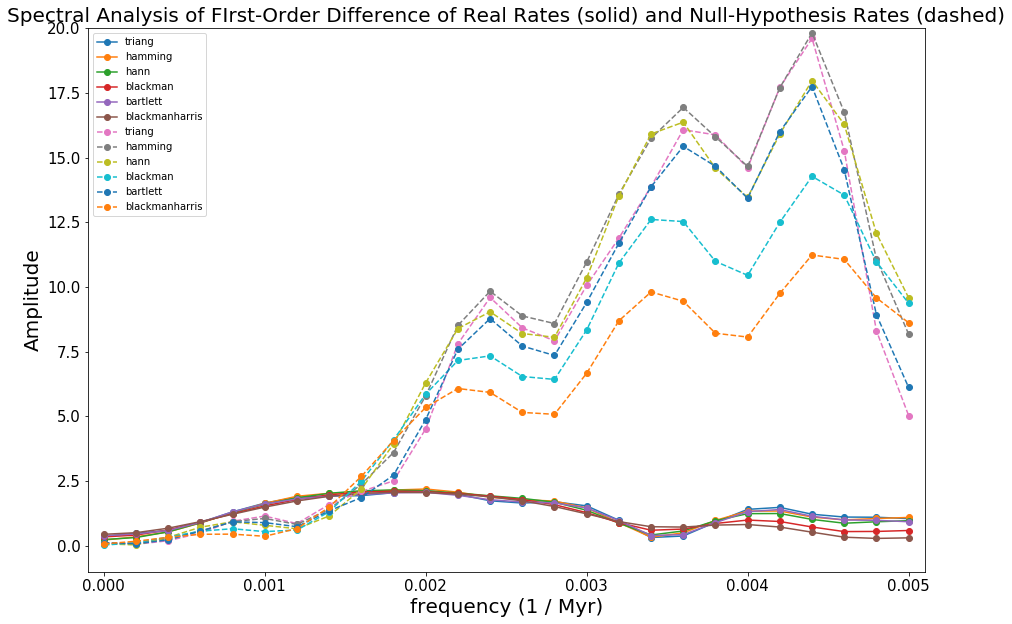

In [38]:
plt.subplots(1, 1, figsize=(15, 10))
m = 24 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

rescaled_real = np.mean(real_SAR202[0:25]) + (real_SAR202[0:25]-np.mean(real_SAR202[0:25])) * 1
diff_Y_i = pd.DataFrame(rescaled_real).diff()
diff_Y_i = diff_Y_i.dropna()

for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:    
    w = np.fft.rfft((diff_Y_i[0] - np.mean(diff_Y_i[0]))* get_window(window, m), n)
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, np.abs(w), '-o', label=window)
    
    
rescaled_null = np.mean(SAR202[5][0:25]) + (SAR202[5][0:25]-np.mean(SAR202[5][1:26]))*63.24
diff_Y_i = pd.DataFrame(rescaled_null).diff()
diff_Y_i = diff_Y_i.dropna()    
    
for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:    
    w = np.fft.rfft((diff_Y_i[0] - np.mean(diff_Y_i[0]))* get_window(window, m), n)
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, np.abs(w), '--o', label=window)
    
plt.ylim(-1,20)
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Spectral Analysis of FIrst-Order Difference of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (25,) and (26,)

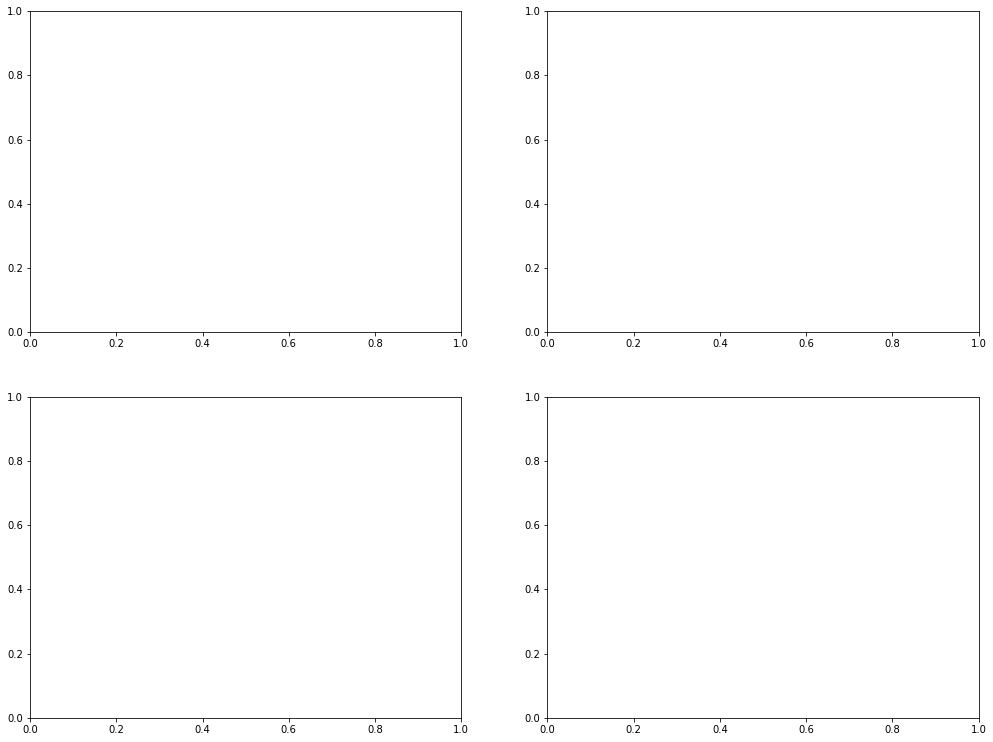

In [39]:
SAR202_middle_age_interval_list = np.linspace(-2600, -100, 25)
SAR202_null_mean = pd.DataFrame(SAR202).mean()
SAR202_difference_middle_age_interval_list = np.linspace(-2500, -100, 25)
import matplotlib.pyplot as plt

fig, (a, b) = plt.subplots(2, 2, figsize=(17, 13))

ax1 = a[0]
ax3 = a[1]
ax2 = b[0]
ax4 = b[1]

ax1.plot(SAR202_middle_age_interval_list, real_SAR202, 'o', color='red')
ax1.plot(SAR202_middle_age_interval_list, real_SAR202 , '-', color='red')
ax1.set_xlim(-2700, 50)
ax1.set_xlabel('time (Myr)',  size = '20')
ax1.set_ylabel('Rates (percent per Myr)', size = '20')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('SAR 202: rate data (n=4000)',  size = '15')


diff_Y_i = pd.DataFrame(real_SAR202).diff()
diff_Y_i = diff_Y_i.dropna()
ax2.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), 'o', color='red')
ax2.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), '-', color='red')
ax2.set_xlim(-2700, 50)
ax2.set_xlabel('time (Myr)',  size = '20')
ax2.set_ylabel('first-order difference (percent per Myr)', size = '20')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_title('SAR 202: first-order difference (n=4000)',  size = '15')

ax3.plot(SAR202_middle_age_interval_list, SAR202_null_mean[0:25], 'o', color='blue')
ax3.plot(SAR202_middle_age_interval_list, SAR202_null_mean[0:25], '-', color='blue')
ax3.set_xlim(-2700, 50)
ax3.set_xlabel('time (Myr)',  size = '20')
#ax3.set_ylabel('Rates (percent per Myr)', size = '20')
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_title('null hypothesis: rate data (n=4000)',  size = '15')


diff_Y_i = pd.DataFrame(SAR202_null_mean[0:25]).diff()
diff_Y_i = diff_Y_i.dropna()
ax4.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), 'o', color='blue')
ax4.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), '-', color='blue')
ax4.set_xlim(-2700, 50)
ax4.set_xlabel('time (Myr)',  size = '20')
#ax4.set_ylabel('first-order difference (percent per Myr)', size = '20')
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.set_title('null hypothesis: first-order difference (n=4000)',  size = '15')
plt.show()

In [ ]:
plt.subplots(1, 1, figsize=(12, 10))
SAR202_null_mean = pd.DataFrame(SAR202).mean()
SAR202_null_std = pd.DataFrame(SAR202).std()
SAR202_difference_middle_age_interval_list = np.linspace(-2400, -100, 24)
SAR202_real_array =pd.DataFrame(real_SAR202)
SAR202_real_rescaled = np.mean(SAR202_real_array) + (SAR202_real_array-np.mean(SAR202_real_array))*63.24
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25], 'o', color='blue', label="mean of first-order difference of null hypothesis (N=1)")
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25], '-', color='blue')
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]+SAR202_null_std[1:25], 'o', color='purple', label="STD of first-order difference of null hypothesis (N=1)")
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]+SAR202_null_std[1:25], '-', color='purple')
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]-SAR202_null_std[1:25], 'o', color='purple')
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]-SAR202_null_std[1:25], '-', color='purple')
#plt.plot(SAR202_difference_middle_age_interval_list, SAR202_real_rescaled.diff().dropna()[0][1:25], 'o', color='red', label="first-order difference of real data (N=1)")
#plt.plot(SAR202_difference_middle_age_interval_list, SAR202_real_rescaled.diff().dropna()[0][1:25], '-', color='red')
plt.xlim(-2500, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('first-order difference (percent per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize=(10,8))
plot_acf(real_SAR202, alpha=0.05, lags=15)

In [ ]:
fixed_topology_null = np.array([ 3.80577063e-01,  3.11489620e-01,  2.91574103e-01,  3.06286064e-01,
                                2.15349732e-01,  1.45148693e-01,  7.55538594e-02,  2.96526433e-02,
                                3.35531580e-02,  2.59543346e-02,  5.61168678e-02,  2.98769577e-03,
                                -1.44999202e-02, -3.17270010e-02, -6.20949047e-02, -1.06357788e-01,
                                -1.20486534e-01, -1.42652769e-01, -2.16844707e-01, -2.26397440e-01,
                                -2.96483228e-01, -3.61027259e-01, -5.04950659e-01, -5.27703662e-01,
                                -8.99349301e-01, -4.65554639e+00])

In [ ]:
from scipy import signal
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:  
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))*63.24
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, (np.abs(w))**2 , '-o', label='real')


m = 26#The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

difference = signal.detrend(fixed_topology_null)
detrended_noise = signal.detrend(difference)
meanremoved_noise = detrended_noise - np.mean(detrended_noise)
applied_window_noise =meanremoved_noise* get_window('hamming', m)
meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
freqs = np.fft.rfftfreq(n, d)
plt.plot(freqs[0:26], 4000*(np.abs(w)**2)[0:26], '-o', color="green",  label="noise")

plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Spectral Analysis of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()